# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [224]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [225]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [226]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#convert to metric
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City Not Found. Skipping...")
        pass
  
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | orchard mesa
Processing Record 2 of Set 1 | guangyuan
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | horqueta
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | ambon
Processing Record 7 of Set 1 | cockburn town
Processing Record 8 of Set 1 | kutum
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | espargos
City Not Found. Skipping...
Processing Record 13 of Set 1 | ciudad lazaro cardenas
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | wolfen
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | mutuali
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | durazno
Processing Record 21 of Set 1 | iqaluit
Processin

In [227]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [228]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,orchard mesa,39.0430,-108.5523,-5.53,39,100,5.14,US,1737390940
1,guangyuan,32.4420,105.8230,8.21,81,49,0.79,CN,1737390941
2,san antonio de pale,-1.4014,5.6325,26.36,82,89,5.36,GQ,1737390942
3,horqueta,-23.3428,-57.0597,33.74,41,99,1.96,PY,1737390943
4,bredasdorp,-34.5322,20.0403,20.26,55,67,5.50,ZA,1737390944


In [229]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [230]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,orchard mesa,39.0430,-108.5523,-5.53,39,100,5.14,US,1737390940
1,guangyuan,32.4420,105.8230,8.21,81,49,0.79,CN,1737390941
2,san antonio de pale,-1.4014,5.6325,26.36,82,89,5.36,GQ,1737390942
3,horqueta,-23.3428,-57.0597,33.74,41,99,1.96,PY,1737390943
4,bredasdorp,-34.5322,20.0403,20.26,55,67,5.50,ZA,1737390944


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

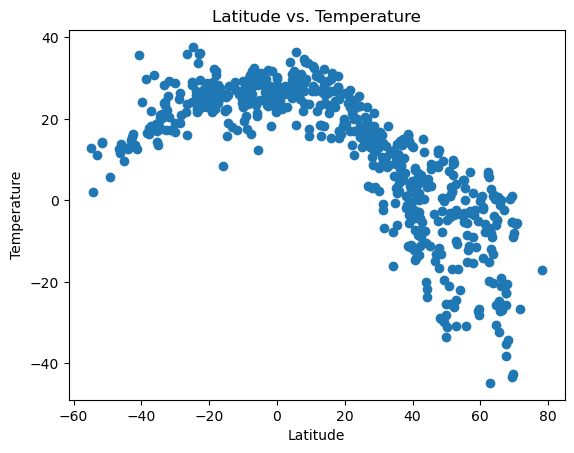

In [231]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Latitude vs. Temperature")
plt.plot(marker='^', markeredgecolor='pink', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

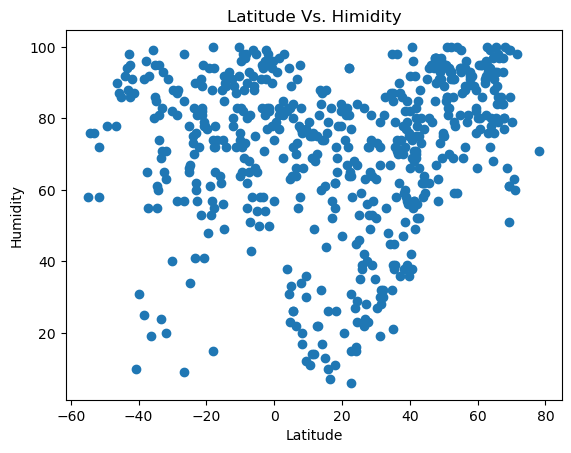

In [232]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Himidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

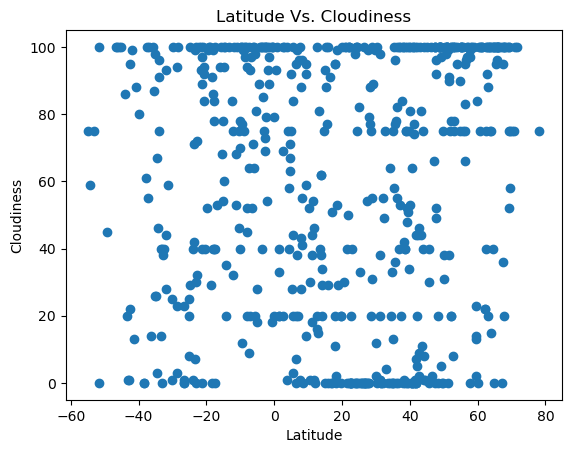

In [233]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude Vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

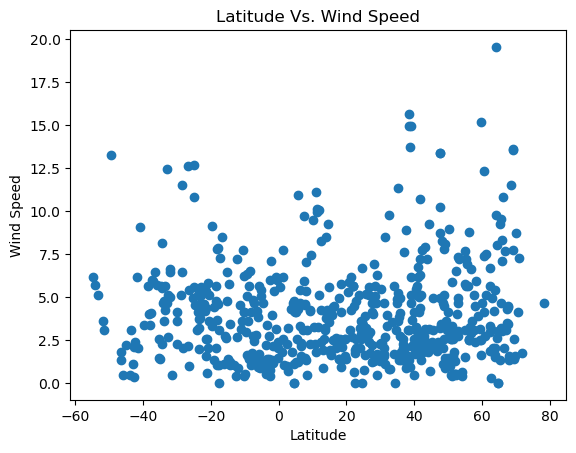

In [234]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('Latitude Vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [235]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      4.085652
1      4.051206
2      3.874602
3      3.760106
4      3.701716
         ...   
575    3.921190
576    3.889320
577    3.915660
578    3.988685
579    4.083734
Name: Lat, Length: 580, dtype: float64


In [236]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,orchard mesa,39.0430,-108.5523,-5.53,39,100,5.14,US,1737390940
1,guangyuan,32.4420,105.8230,8.21,81,49,0.79,CN,1737390941
6,cockburn town,21.4612,-71.1419,26.98,83,40,6.17,TC,1737390947
7,kutum,14.2000,24.6667,23.95,17,29,4.25,SD,1737390948
9,yellowknife,62.4560,-114.3525,-19.77,92,75,6.71,CA,1737390950


In [237]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san antonio de pale,-1.4014,5.6325,26.36,82,89,5.36,GQ,1737390942
3,horqueta,-23.3428,-57.0597,33.74,41,99,1.96,PY,1737390943
4,bredasdorp,-34.5322,20.0403,20.26,55,67,5.50,ZA,1737390944
5,ambon,-3.6954,128.1814,28.26,95,40,0.51,ID,1737390945
8,east london,-33.0153,27.9116,23.52,83,40,4.63,ZA,1737390949


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6960213931518802


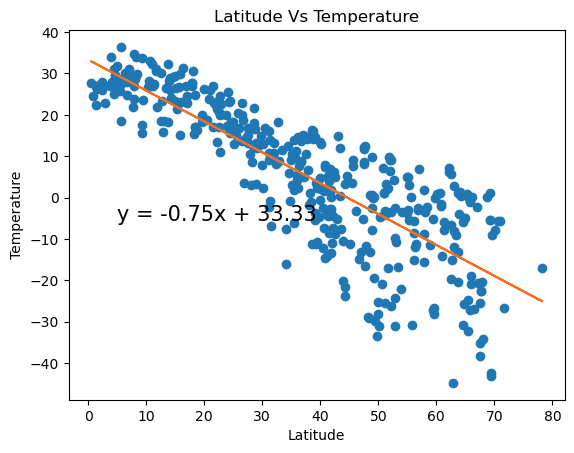

In [238]:
# Linear regression on Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_temp)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_temp)
plt.plot(northern_x_value, regress_values, color="#F37021")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq, (5, -5.5), fontsize=15, color="k")
plt.title("Latitude Vs Temperature")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.2985727224951936


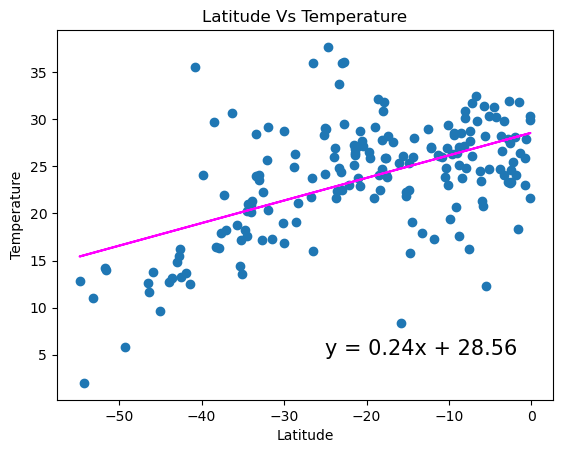

In [239]:
# Linear regression on Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_temp)

regress_values = southern_x_value * slope + intercept

line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_temp)
plt.plot(southern_x_value, regress_values, color="magenta")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq2, (-25, 5), fontsize=15, color="k")
plt.title("Latitude Vs Temperature")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 


In [240]:
# In the northern hemisphere, temperature trends in a downwards linear fashion, while in the southern hemisphere, the temperature follows an upward linear trend.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.2030688086349974


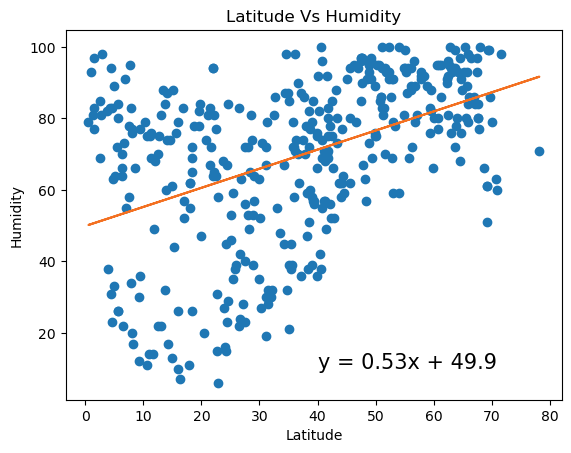

In [241]:
# Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"]
northern_humidity = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_humidity)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_humidity)
plt.plot(northern_x_value, regress_values, color="#F37021")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (40, 10), fontsize=15, color="k")
plt.title("Latitude Vs Humidity")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.014183945459595256


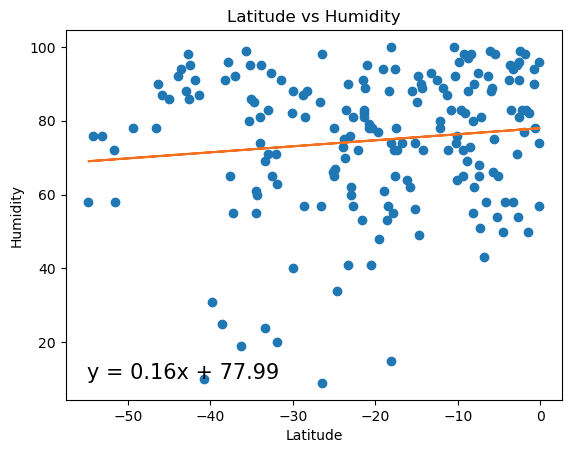

In [242]:
# Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_humidity)

regress_values = southern_x_value * slope + intercept

line_eq = "y = " + str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_humidity)
plt.plot(southern_x_value, regress_values, color="#F37021")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-55,10), fontsize=15, color="k")
plt.title("Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

In [243]:
# Both hemispheres exhibit a clear positive linear growth trend across the graph.
# However, humidity grows at a more intense rate in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.07891795082757978


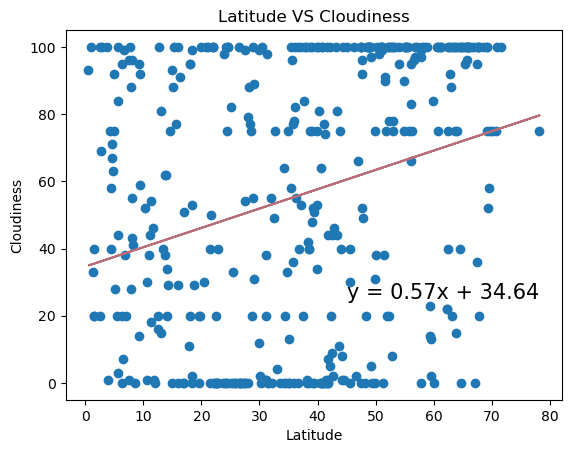

In [244]:
# Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_cloudiness)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_cloudiness)
plt.plot(northern_x_value, regress_values, color="#B76E79")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (45, 25), fontsize=15, color="k")
plt.title("Latitude VS Cloudiness")

print(f"The r^2-value is: {rvalue**2}")
plt.show()


**Discussion about the linear relationship:** 

In [245]:
# The data indicates that the northern Hemisphere experiences more cloud coverage than the southern hemisphere.
# Additionally, cloud coverage increases with the latitude. Most of the readings were clustered.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.015197635986737776


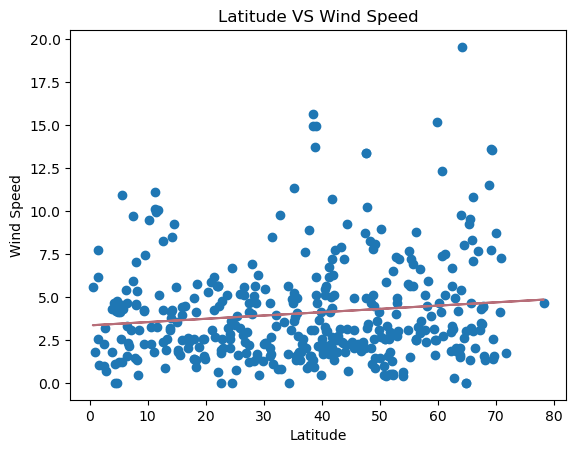

In [246]:
# Northern Hemisphere
northern_x_value = northern_hemi_df["Lat"]
northern_wind_speed = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_value, northern_wind_speed)

regress_values = northern_x_value * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_x_value, northern_wind_speed)
plt.plot(northern_x_value, regress_values, color="#B76E79")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (45, 25), fontsize=15, color="k")
plt.title("Latitude VS Wind Speed")

print(f"The r^2-value is: {rvalue**2}")
plt.show()


The r^2-value is: 0.04875353916097969


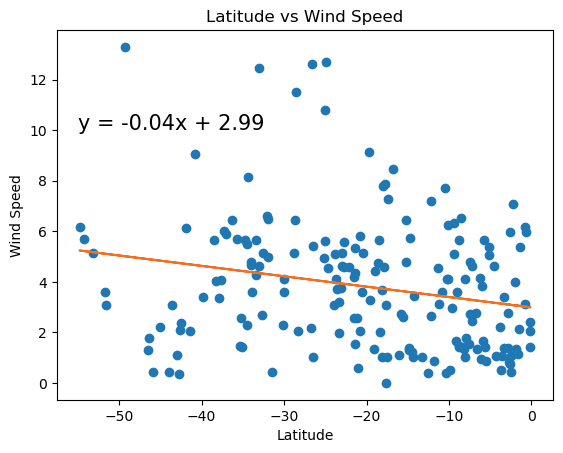

In [247]:
# Southern Hemisphere
southern_x_value = southern_hemi_df["Lat"]
southern_wind_speed = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_value, southern_wind_speed)

regress_values = southern_x_value * slope + intercept

line_eq = "y = " + str (round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_x_value, southern_wind_speed)
plt.plot(southern_x_value, regress_values, color="#F37021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-55,10), fontsize=15, color="k")
plt.title("Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [248]:
# The graphs demonstrate a positive correlation in the Northern Hemisphere and a negative correlation in the Southern Hemisphere.
# In both plots, the data points are clustered at low wind speeds and scatter as the wind speed increases. 